In [3]:
import torch
print("PyTorch:", torch.__version__)
print("MPS available:", torch.backends.mps.is_available())

PyTorch: 2.9.1
MPS available: True


In [4]:
import sys, os
import torch
print("Python:", sys.version.split()[0])
print("Torch:", torch.__version__)
print("MPS available:", torch.backends.mps.is_available())

Python: 3.10.19
Torch: 2.9.1
MPS available: True


In [5]:
import sys
!{sys.executable} -m pip install scikit-learn pandas numpy matplotlib seaborn nltk spacy joblib
!{sys.executable} -m python -m spacy download en_core_web_sm

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
/Users/himanshuagnihotri/miniforge3/envs/sentiment/bin/python3: No module named python


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')

data = [
    ("I love the new update — app runs so smoothly!", "positive"),
    ("This is the worst experience, app keeps crashing.", "negative"),
    ("Pretty decent functionality, nothing extraordinary.", "neutral"),
    ("Amazing UI and performance. Great job!", "positive"),
    ("I hate the new UI, it's confusing.", "negative"),
    ("Works ok, could be better.", "neutral"),
]
df = pd.DataFrame(data, columns=["text", "label"])
df

Matplotlib is building the font cache; this may take a moment.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/himanshuagnihotri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himanshuagnihotri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text     label
0      I love the new update — app runs so smoothly!  positive
1  This is the worst experience, app keeps crashing.  negative
2  Pretty decent functionality, nothing extraordi...   neutral
3             Amazing UI and performance. Great job!  positive
4                 I hate the new UI, it's confusing.  negative
5                         Works ok, could be better.   neutral

In [11]:
# Basic preprocessing function
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+','', text)           # remove urls
    text = re.sub(r'@\w+','', text)                     # remove mentions
    text = re.sub(r'[^a-z0-9\s]',' ', text)             # remove punctuation (keep alnum)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    return " ".join(tokens)

df['clean'] = df['text'].apply(clean_text)
df


text     label  \
0      I love the new update — app runs so smoothly!  positive   
1  This is the worst experience, app keeps crashing.  negative   
2  Pretty decent functionality, nothing extraordi...   neutral   
3             Amazing UI and performance. Great job!  positive   
4                 I hate the new UI, it's confusing.  negative   
5                         Works ok, could be better.   neutral   

                                               clean  
0                  love new update app runs smoothly  
1                worst experience app keeps crashing  
2  pretty decent functionality nothing extraordinary  
3                   amazing ui performance great job  
4                              hate new ui confusing  
5                              works ok could better

In [9]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/himanshuagnihotri/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/himanshuagnihotri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df['clean'] = df['text'].apply(clean_text)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean'], df['label'], 
    test_size=0.33, random_state=42
)

X_train, X_test, y_train, y_test


(5                                works ok could better
 2    pretty decent functionality nothing extraordinary
 4                                hate new ui confusing
 3                     amazing ui performance great job
 Name: clean, dtype: object,
 0      love new update app runs smoothly
 1    worst experience app keeps crashing
 Name: clean, dtype: object,
 5     neutral
 2     neutral
 4    negative
 3    positive
 Name: label, dtype: object,
 0    positive
 1    negative
 Name: label, dtype: object)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vectorize
vect = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_vec, y_train)


LogisticRegression(max_iter=500)

/Users/himanshuagnihotri/miniforge3/envs/sentiment/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/himanshuagnihotri/miniforge3/envs/sentiment/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/himanshuagnihotri/miniforge3/envs/sentiment/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



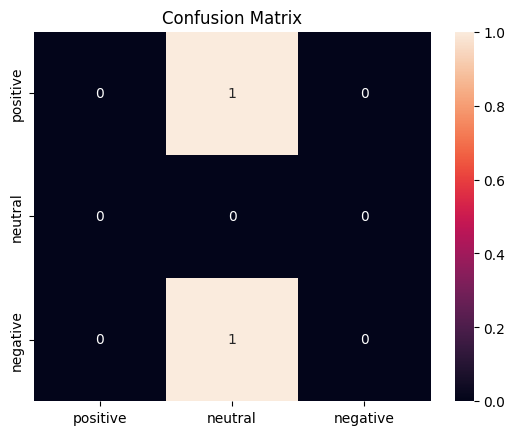

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['positive','neutral','negative'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['positive','neutral','negative'], yticklabels=['positive','neutral','negative'])
plt.title("Confusion Matrix")
plt.show()


In [16]:
import joblib
import os

os.makedirs('../models', exist_ok=True)
joblib.dump(vect, '../models/tfidf_vectorizer.joblib')
joblib.dump(clf, '../models/logreg_sentiment.joblib')

print("Saved model + vectorizer to ../models/")


Saved model + vectorizer to ../models/


In [17]:
def predict_text(text):
    c = clean_text(text)
    v = vect.transform([c])
    pred = clf.predict(v)[0]
    probs = clf.predict_proba(v)[0]
    return pred, dict(zip(clf.classes_, probs))

print(predict_text("I absolutely love this product!"))
print(predict_text("This update ruined everything."))


('neutral', {'negative': np.float64(0.24335466365668326), 'neutral': np.float64(0.5132906726866335), 'positive': np.float64(0.24335466365668326)})
('neutral', {'negative': np.float64(0.24335466365668326), 'neutral': np.float64(0.5132906726866335), 'positive': np.float64(0.24335466365668326)})
